In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
import os
import sys

# Setup python path to find the modules
model_root = os.getcwd()
project_root=os.path.abspath(os.path.join(model_root,".."))

src_path = os.path.join(project_root,"src")

if src_path not in sys.path:
    sys.path.append(src_path)

In [9]:
try:
    from src.config import image_classes, train_dir, test_dir
    from src.plot_utils import display_sample_images, plot_class_distribution
    from src.data_preprocessing_utils import load_and_preprocess_data, count_images_in_subfolders
except ImportError as e:
    print(f"Error importing modules: {e}")

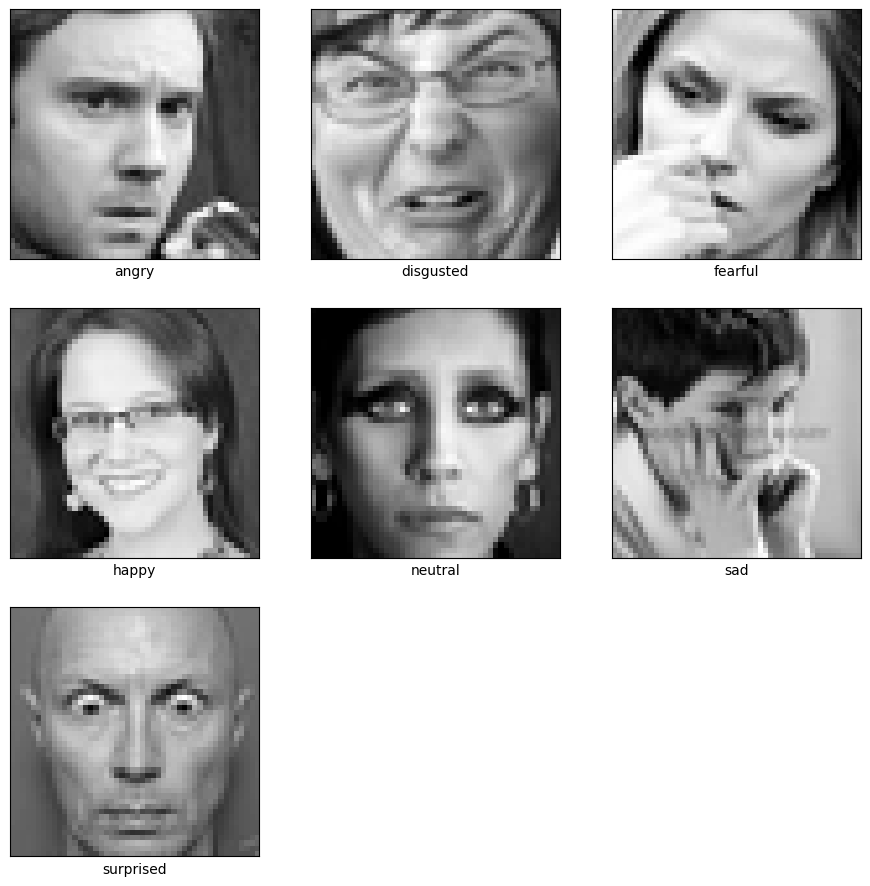

In [10]:
# Display one sample image from each folder
display_sample_images(train_dir, image_classes)

In [11]:
train_images_count = count_images_in_subfolders(train_dir)
test_images_count = count_images_in_subfolders(test_dir)

print(f"Number of training images per class: {train_images_count}")
print(f"Number of test images per class: {test_images_count}")

Number of training images per class: {'angry': 3995, 'disgusted': 436, 'fearful': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprised': 3171}
Number of test images per class: {'angry': 958, 'disgusted': 111, 'fearful': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprised': 831}


In [12]:
img_size = (48,48)

train_images, train_labels = load_and_preprocess_data(train_dir, img_size, color_mode='grayscale')
x_test, y_test = load_and_preprocess_data(test_dir, img_size, color_mode='grayscale')

KeyboardInterrupt: 

In [20]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

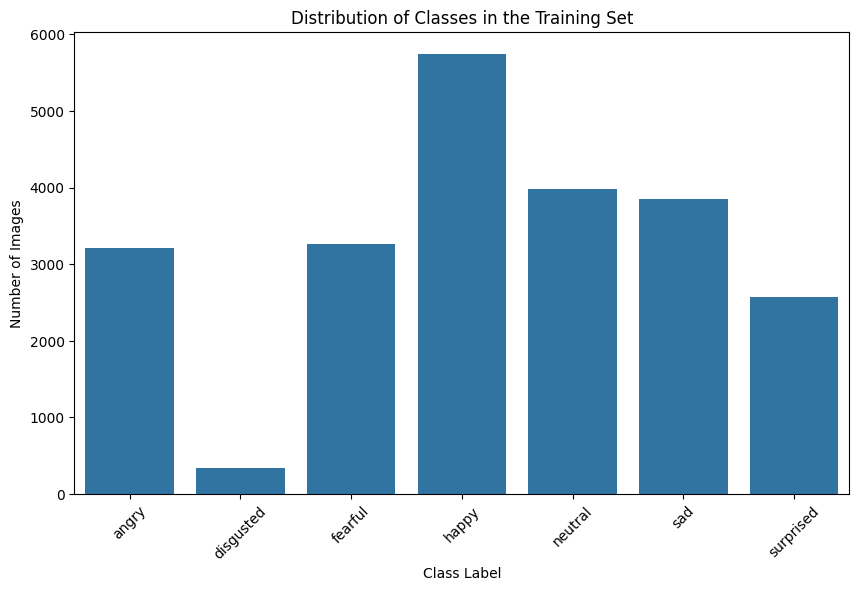

In [21]:
plot_class_distribution(y_train)

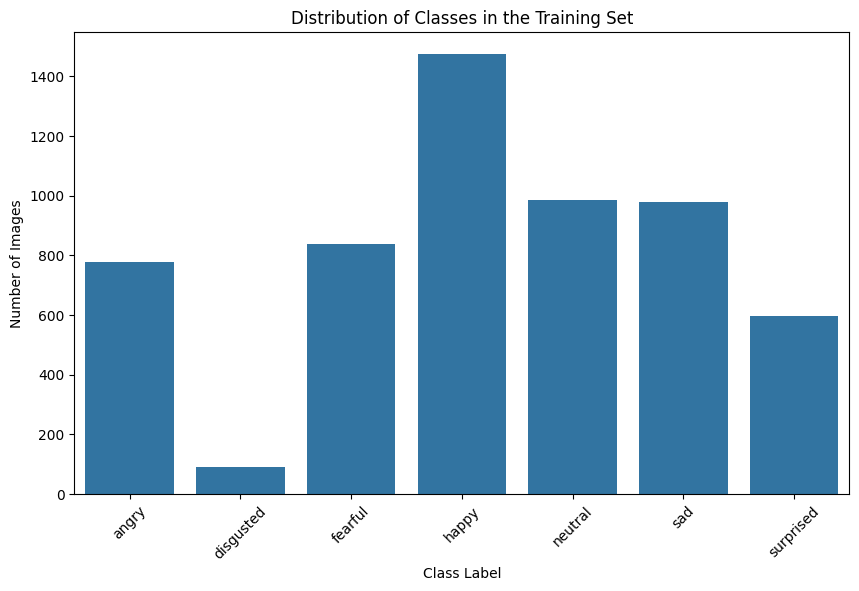

In [22]:
plot_class_distribution(y_val)

In [23]:
print("Saving processed data")

np.savez_compressed(
    'emotion_detection_data.npz',
    x_train=x_train,
    y_train=y_train,
    x_val=x_val,
    y_val=y_val,
    x_test=x_test,
    y_test=y_test
)

print("Data saved successfully")

Saving processed data


In [ ]:
from src.data_preprocessing_utils import create_val_set
from src.config import val_dir

# Create validation set
create_val_set(val_dir)